# 1️⃣ Data Cleaning & Preparation 
 **Handle Missing Values**

Fill or remove missing values (e.g., impute postal codes).
 **Remove Duplicates**

Drop duplicate rows to maintain data accuracy.
  **Check for Outliers**
Identify anomalies in *Sales, Profit, and Quantity* using boxplots.

# 2️⃣ Exploratory Data Analysis (EDA) & Visualization 📊
Summary Statistics: Use mean, median, min, max for Sales and Profit analysis.
Sales Distribution: Use Histogram or boxplot for Sales, Profit, and Discount. Identify best and worst-performing categories.
Regional Sales Insights: Top cities, states, and regions by Total Sales & Profit. Use bar charts or heatmaps.
Product Analysis: Identify top-selling and low-demand products. Also, find most profitable and loss-making items.

# 3️⃣ Sales Forecasting Using Statistical Methods 📈
📈 **Moving Averages**
🔹 **Simple Moving Average (SMA):** Average sales over the last *N* periods.
🔹 **Exponential Moving Average (EMA):** Weighted trend tracking for smoother forecasts.
📉 **Trend & Seasonality Detection**

📊 Decompose sales data into **Trend, Seasonality, and Residuals**.
📆 Identify **peak seasons** for *inventory planning* and *pricing strategies*.
📊 **Sales Growth Analysis**

📈 Compare **Year-over-Year (YoY)** or **Month-over-Month (MoM)** growth.
📊 Calculate **Cumulative Sales** over time to detect long-term trends.
#  4️⃣ Business Insights & Optimization  
📈 **Discount Impact Analysis**

🔹 **Compare profit margins** before and after discounts.
🔹 **Identify if higher discounts** lead to more sales or lower profits.
  **Shipping Performance**

🔹 **Find the fastest and slowest shipping modes**.
🔹 **Analyze order delays and their impact on customer satisfaction**.
  **Customer Behavior Analysis**

🔹 **Identify repeat customers vs. one-time buyers**.
🔹 **Segment customers based on purchase patterns**.
🌎 **Regional Strategy**

🔹 **Focus on high-profit regions for marketing & inventory optimization**.
🔹 **Identify underperforming regions and create strategies for improvement**.

# 5️⃣ Visualization & Reporting  
  **Dashboard Creation**

  **Use Excel, Power BI, or Tableau** to create **interactive dashboards**.
  **Actionable Recommendations**

   **Adjust pricing and discounts** based on **historical analysis**.
    **Optimize inventory & shipping** based on **demand patterns**.
    **Focus marketing efforts** on *high-value customers* and *profitable regions*.
 
#  6️⃣ Model Development & Evaluation 
 Neural Network Modeling Steps

🔹 Build a Sequential model using TensorFlow/Keras.
🔹 Add Dense layers with ReLU activation and dropout for regularization.
🔹 Compile the model using the Adam optimizer and MSE loss function.
🔹 Train the model with training data and validate using a split of the data.
🔹 Evaluate model performance using Mean Absolute Error (MAE).
🔹 Predict outcomes on test data (X_test).

  # 7️⃣ CONFIGURATION 
    Libraries
The analysis utilizes Python libraries for data manipulation and visualization:

🔹 Pandas – Data processing & cleaning
🔹 Matplotlib / Seaborn – Data visualization
🔹 Scipy – Statistical analysis
🔹 Calendar – Date-related operations

# Importing libraries

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations 

# Data Cleaning and Preprocessing


In [5]:
df = pd.read_csv("sales forecasting.csv",encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# Exploring the Dataset
Provides an overview of data types and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

# Summary Statistics 

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


# checking for missing value

In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Handling Duplicates data

In [13]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()
# Remove duplicate rows from the dataset in place
df.drop_duplicates(inplace=True)

# Checking unique values

In [14]:
df.nunique()

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64

# Remvoeing constant columns

In [15]:
# Drop columns that have only one unique value
df.drop(columns=df.nunique()[df.nunique() == 1].index, inplace=True)
# Display the updated DataFrame
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-TA-10001539,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# Dropping Unnecessary columns


In [16]:
columns_to_drop=['Row ID','Order ID','Customer ID','Ship Date','Order Date','Product ID','Postal Code','Customer Name']
df.drop(columns=columns_to_drop, inplace=True)
df

,Ship Mode,Segment,City,State,Region,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Standard Class,Consumer,Fort Lauderdale,Florida,South,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,Standard Class,Consumer,Los Angeles,California,West,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,Standard Class,Consumer,Los Angeles,California,West,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...
2116,First Class,Home Office,Houston,Texas,Central,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,Second Class,Corporate,Newark,Delaware,East,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,Second Class,Consumer,Lafayette,Louisiana,South,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,Second Class,Consumer,Miami,Florida,South,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


# Exploratory Data Analysis (EDA)
Histogram for numerical features

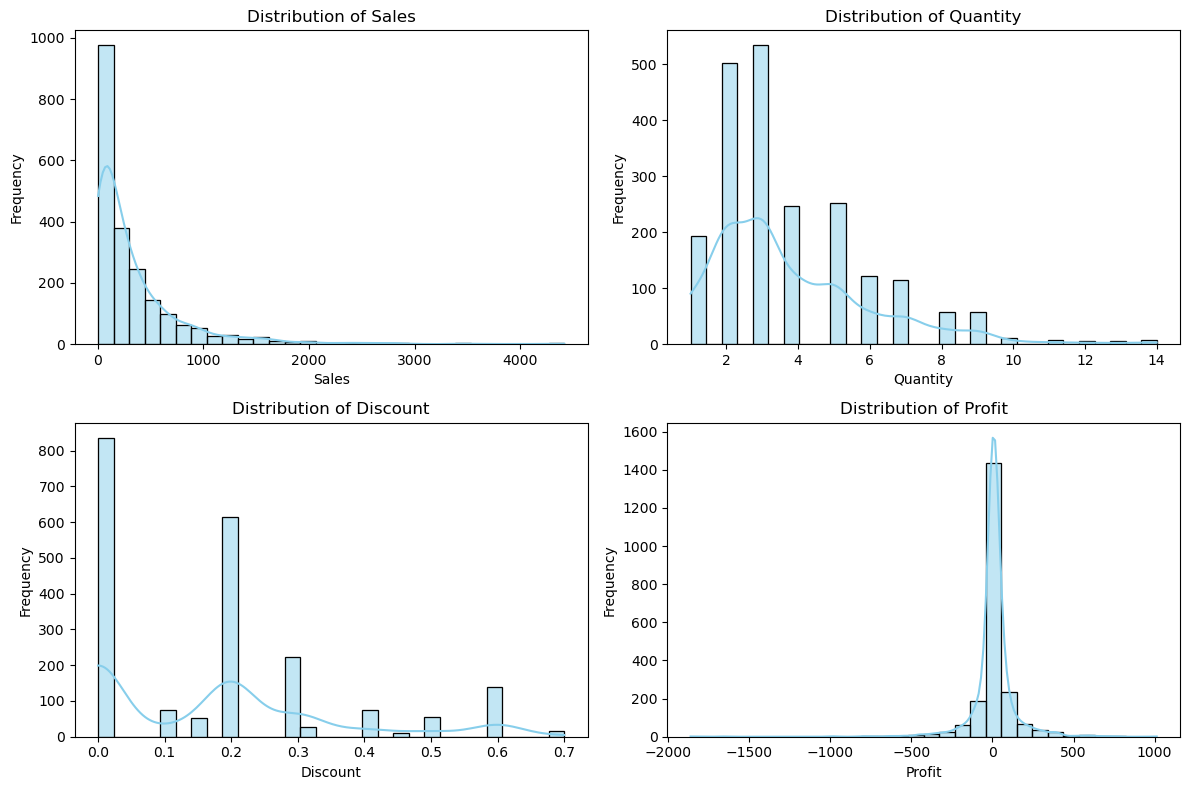

In [18]:
num_features = ['Sales', 'Quantity', 'Discount','Profit']

# Set up the plotting area
plt.figure(figsize=(12, 8))

# Plot histograms for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation Analysis
Heatmap of Key Metrics Correlation
The following heatmap visualizes the correlation between four key business metrics: Sales, Quantity, Discount, and Profit. Correlation measures the strength and direction of relationships between these variables, helping us understand potential dependencies

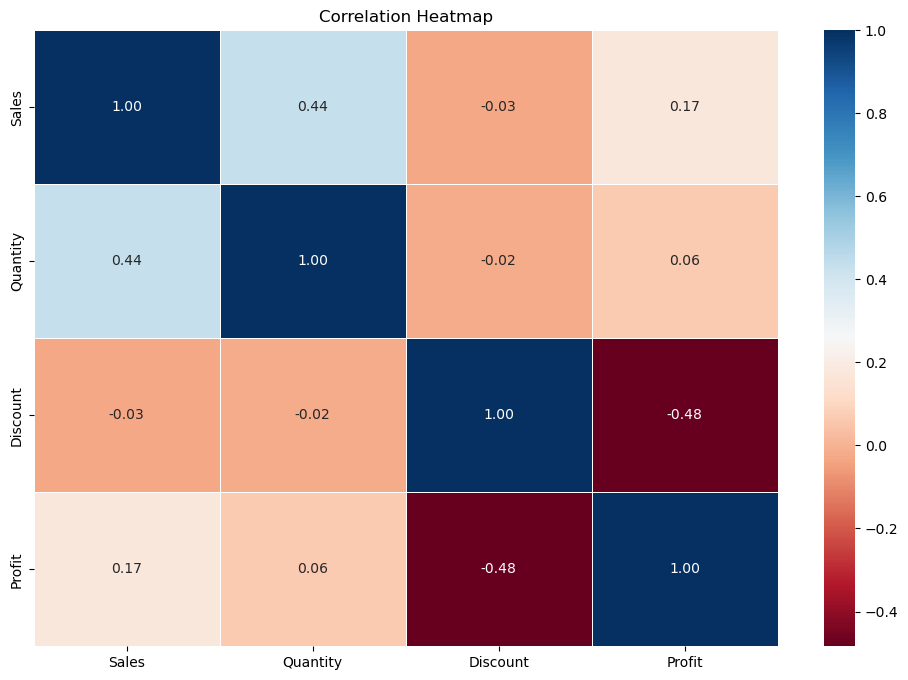

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Outlier 

In [22]:
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit']

# Detect outliers using IQR for each numerical feature
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f'Feature: {feature}')
    print(f'Number of Outliers: {outliers.shape[0]}')
    print(outliers[[feature]])

Feature: Sales
Number of Outliers: 164
         Sales
4     1706.184
6     1044.630
7     3083.430
35    1951.840
37    1740.060
...        ...
2063  4404.900
2069  1403.920
2074  1023.332
2092  3393.680
2114  1925.880

[164 rows x 1 columns]
Feature: Quantity
Number of Outliers: 39
      Quantity
32          14
85          13
158         10
159         11
195         12
210         13
219         14
259         12
301         14
335         13
606         11
723         10
759         12
843         11
845         11
891         11
1099        10
1142        10
1160        11
1171        14
1194        10
1276        11
1285        14
1290        10
1365        10
1458        12
1551        14
1645        10
1689        12
1793        10
1805        10
1814        14
1876        10
1879        12
1923        11
2012        10
2019        14
2044        13
2062        13
Feature: Discount
Number of Outliers: 0
Empty DataFrame
Columns: [Discount]
Index: []
Feature: Profit
Number of Outl

# Exploratory Data Analysis (EDA) on Categorical Features¶
This analysis focuses on exploring the distribution of categorical features in the dataset. We visualize the counts of different categories to gain insights into the dataset composition.

Categorical Features Analyzed

Ship Mode: Different modes of shipment available.
Segment: Customer segments such as Consumer, Corporate, and Home Office.
Region: Geographical regions where sales occur.
Sub-Category: Various product sub-categories available in the dataset.

Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\1477392013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'


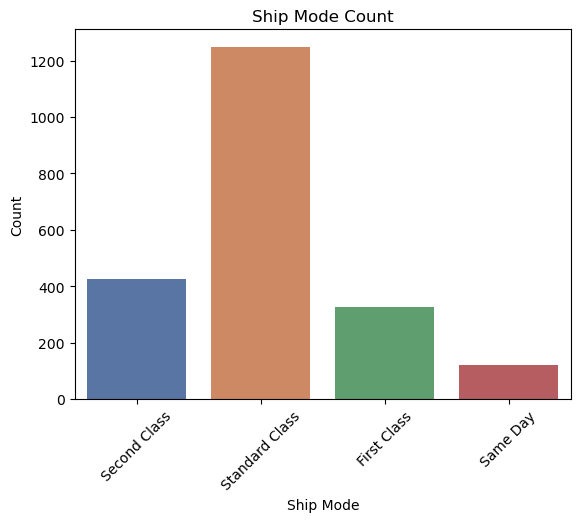

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\1477392013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'


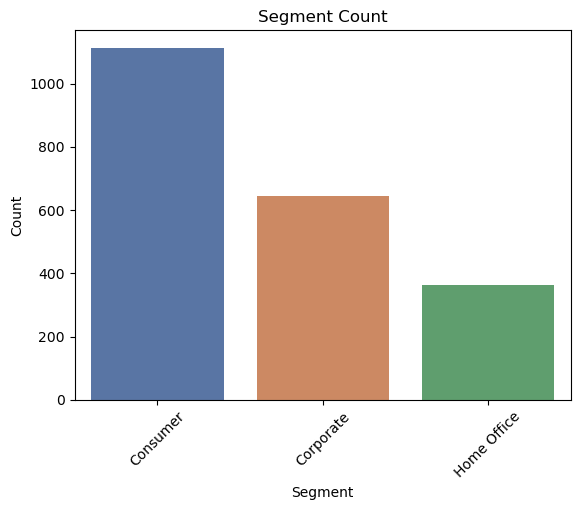

Region
West       707
East       601
Central    481
South      332
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\1477392013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'


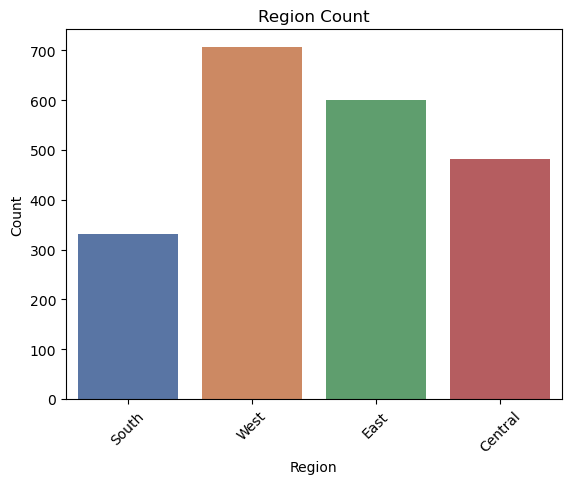

Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\1477392013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'


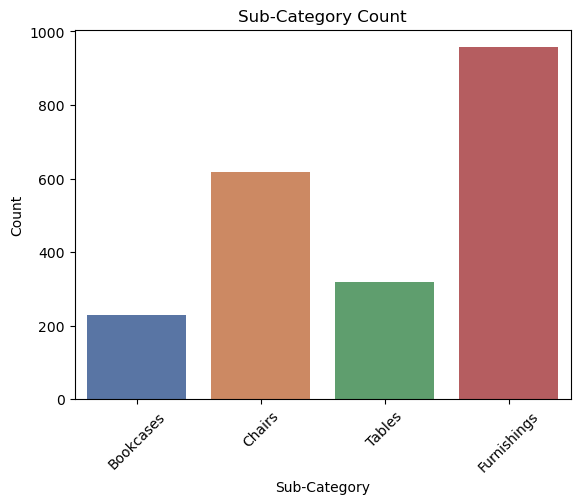

In [23]:
# Categorical features
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']

for feature in categorical_features:
    print(df[feature].value_counts())
    sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'
    plt.title(f'{feature} Count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Ship Mode Count

"Standard Class" is the most frequently used shipping method.
"Same Day" shipping has the lowest count.
 # Segment Count

The "Consumer" segment is the most dominant in the dataset.
" Home Office" has the least number of orders.
# Region Count

The "West" region has the highest number of transactions.
The "South" region has the lowest count.
# Sub-Category Count
"Furnishings" has the highest number of sales.
"Bookcases" has the lowest number of sales.

# Visualizing Region Distribution
This visualization provides insights into the distribution of sales across different regions. Understanding the sales volume per region helps in identifying key markets and potential areas for expansion.

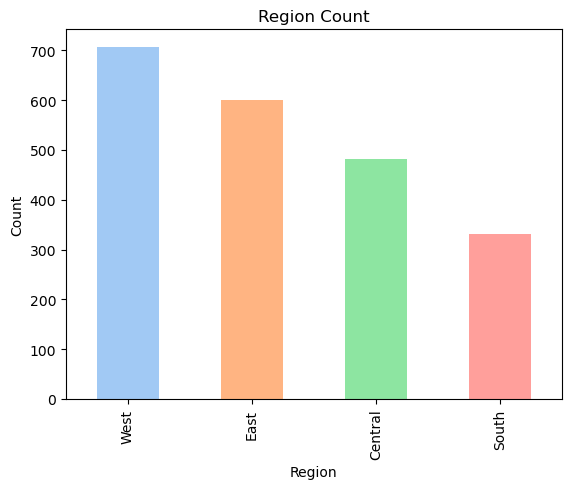

In [24]:
colors = sns.color_palette('pastel')

# Plot the bar chart with custom colors
df.Region.value_counts().plot(kind="bar", color=colors)

# Add titles and labels for clarity (optional)
plt.title("Region Count")
plt.xlabel("Region")
plt.ylabel("Count")

# Display the plot
plt.show()

# Analysis & Observations

The West region has the highest number of transactions.
The East and Central regions follow with moderate sales numbers.
The South region has the lowest transaction count, indicating a smaller customer base or market penetration.

# Visualizing Sub-Category Distribution with a Pie Chart
This analysis explores the distribution of categorical features in our dataset. The features analyzed include:

Ship Mode
Segment
Region
Sub-Category

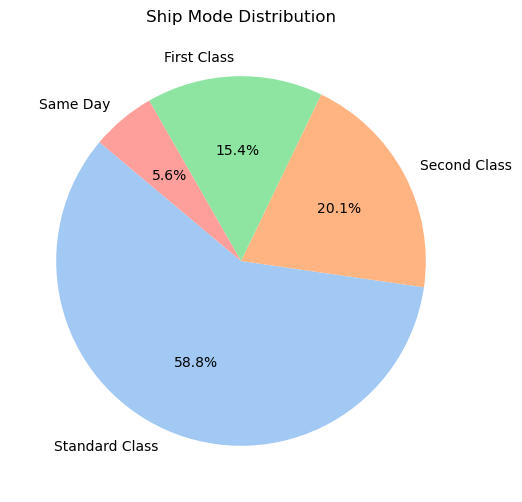

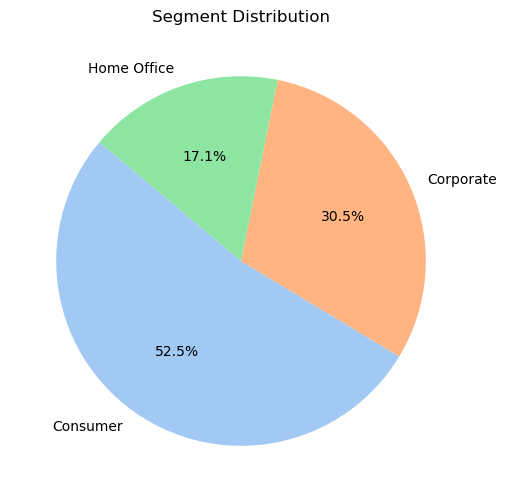

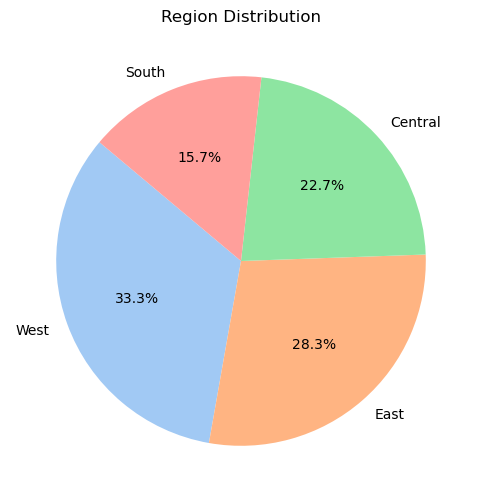

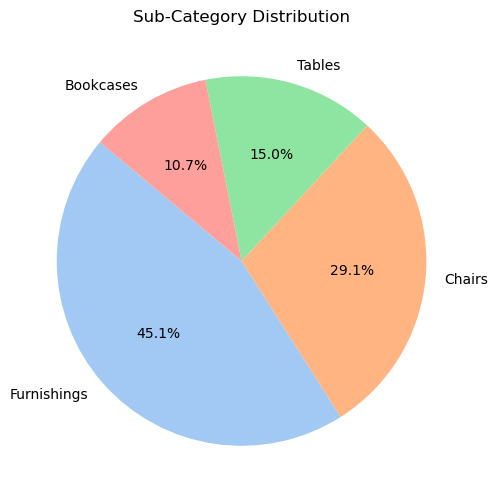

In [25]:
# Categorical features
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']

for feature in categorical_features:
    # Get value counts
    counts = df[feature].value_counts()

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'{feature} Distribution')

    plt.show()

# Region vs. Segment Distribution¶
This bar chart illustrates the distribution of customer segments across different regions. Analyzing this data can provide insights into customer demographics and market reach across different locations.

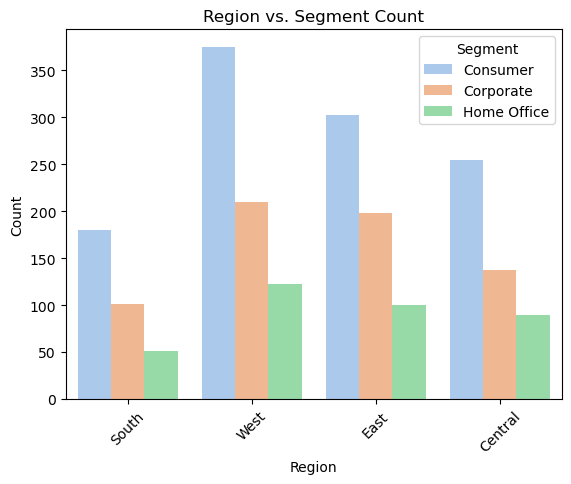

In [26]:
sns.countplot(x='Region', hue='Segment', data=df, palette='pastel')
plt.title("Region vs. Segment Count")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Insights

- The Consumer segment is the largest across all regions, particularly in the West.
- The Corporate segment follows in second place, with relatively high representation in the West and East.
- The Home Office segment has the lowest count but maintains a presence across all regions.
- The West region has the highest number of customers across all segments, while South has the least.

# Top 10 Products by Total Sales¶
This bar chart visualizes the top 10 best-selling products based on total sales. Identifying high-revenue products helps businesses optimize inventory, marketing, and sales strategies.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\99675262.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')


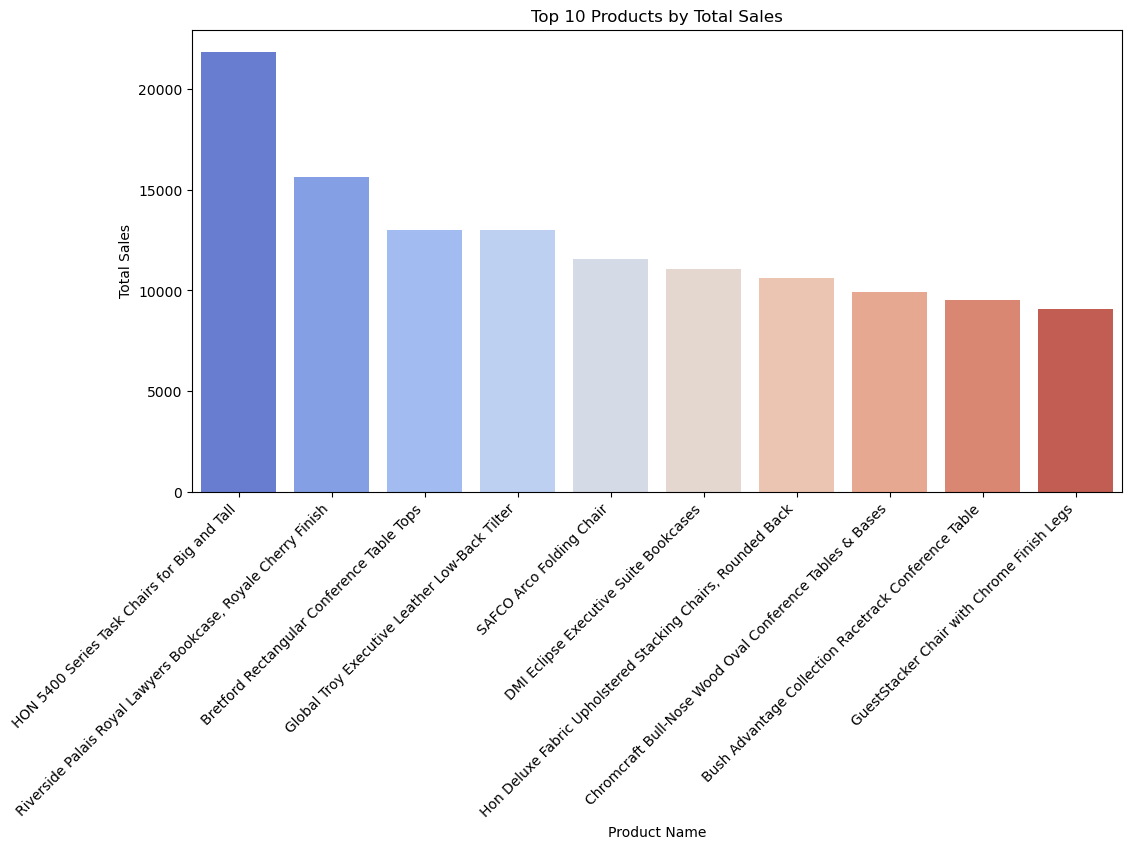

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort products by total sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

The SAFCO Arco Folding Chair has the highest total sales, making it the top-performing product.
Several conference tables and office chairs dominate the top 10, indicating a high demand for office furniture.
The sales gap between the top products suggests varying levels of customer preference and purchasing trends.

# Modeling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y = df['Sales']

X = df.drop(['Sales', 'Product Name'], axis=1)

X = pd.get_dummies(X, drop_first=True)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [31]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [33]:
print("Linear Regression Performance:")
print("R^2 score:", f"{score:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Linear Regression Performance:
R^2 score: 24.98%
MAE: 291.58
MSE: 229869.49
RMSE: 479.45


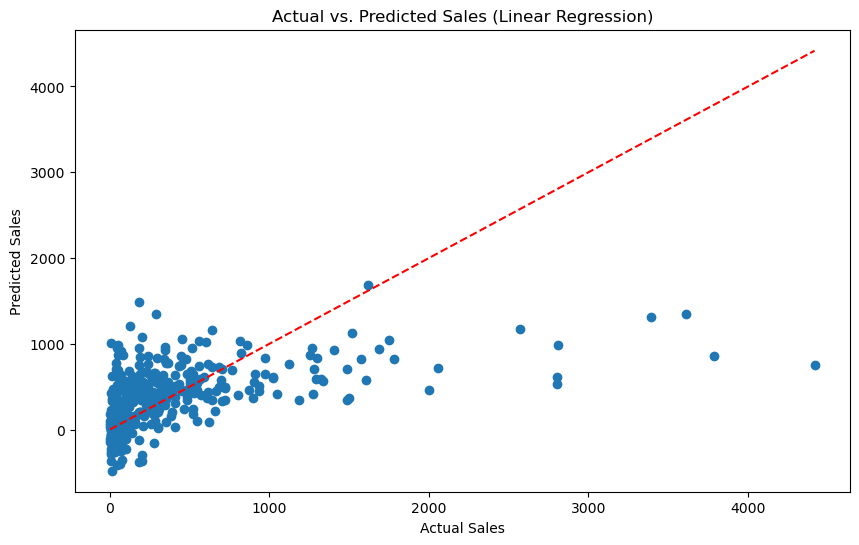

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

r2 = r2_score(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)

print("Gradient Boosting Regression Performance:")
print(f"R² Score: {r2:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Gradient Boosting Regression Performance:
R² Score: 72.63%
MAE: 124.61
MSE: 83860.23
RMSE: 289.59


In [42]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print("XGBoost Regression Performance:")
print(f"R² Score: {r2:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

XGBoost Regression Performance:
R² Score: 70.18%
MAE: 130.00
MSE: 91362.54
RMSE: 302.26


In [47]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(clf, X, Y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=10, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), verbose=0
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid(True)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")

    plt.legend(loc="best")
    plt.show()

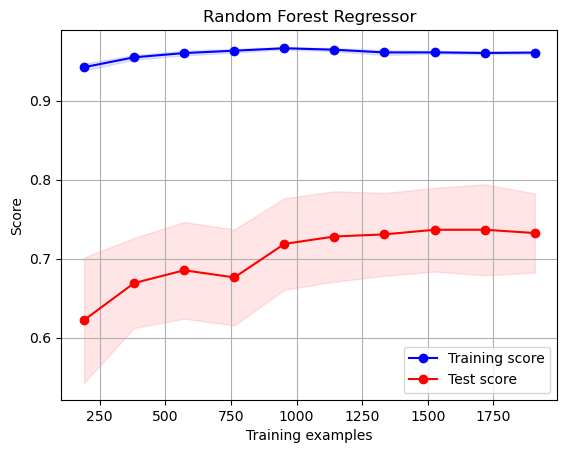

In [49]:
from sklearn.ensemble import RandomForestRegressor

# 1. define model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train  model
rf_model.fit(X_train, y_train)

# 3. call plotting function
plot_learning_curve(rf_model, X, y, "Random Forest Regressor")


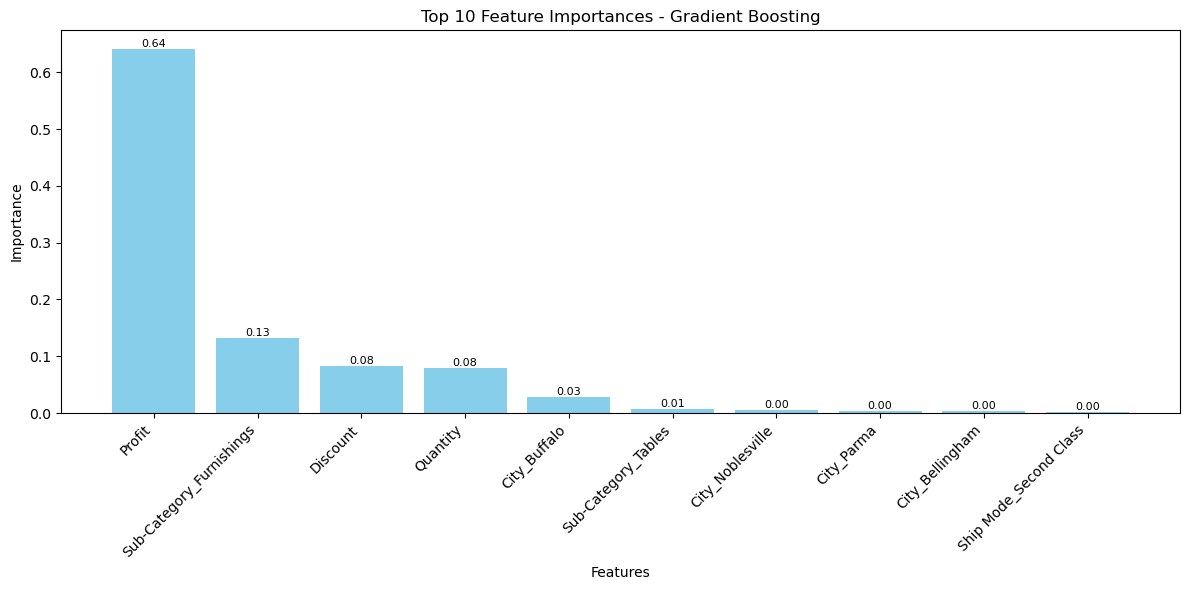

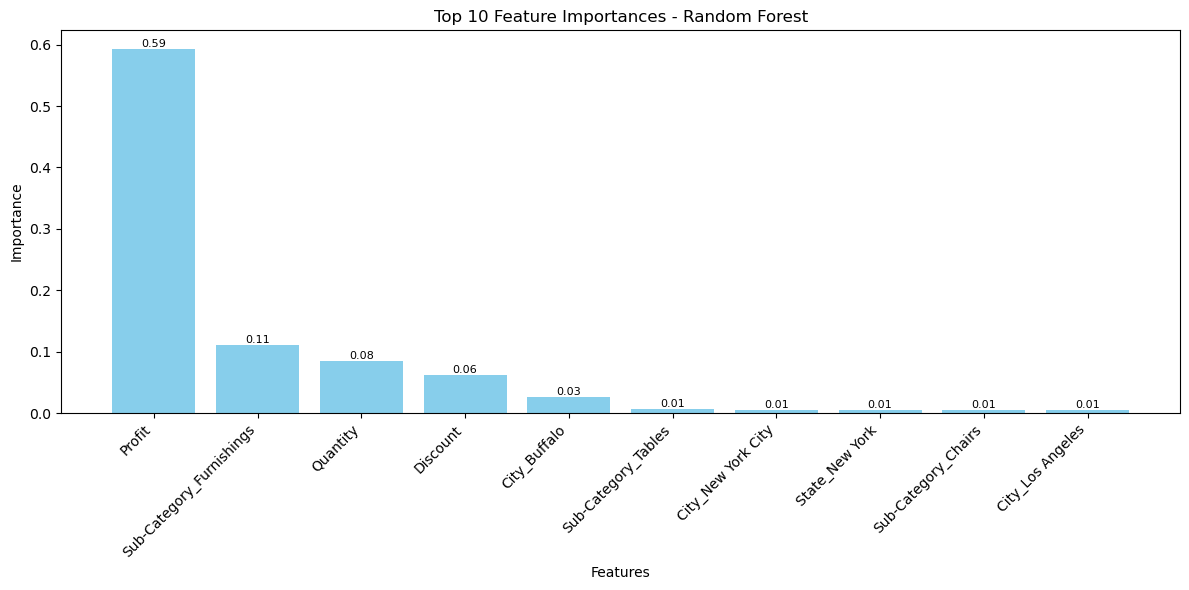

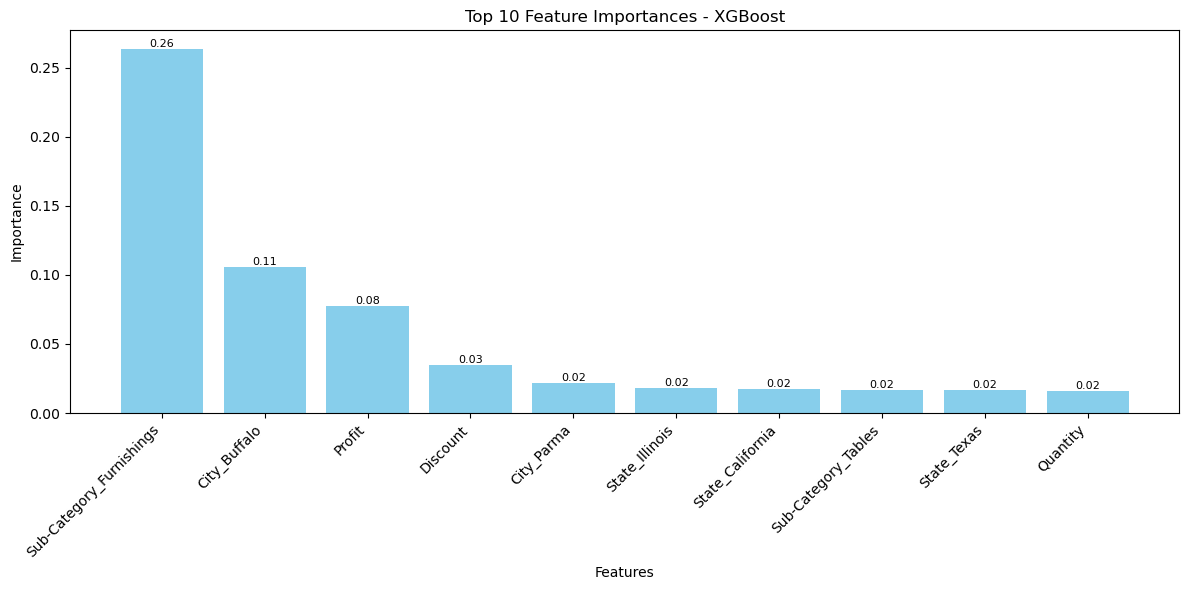

In [50]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

models = [('Gradient Boosting', gbr_model),
          ('Random Forest', rf_model),
           ('XGBoost', xgb_model)
         ]

# Loop through each model and plot feature importances
for model_name, model in models:
    # Get feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    top_n = 10
    top_indices = indices[:top_n]
    top_features = X.columns[top_indices]
    top_importances = importances[top_indices]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.title(f"Top {top_n} Feature Importances - {model_name}")
    bars = plt.bar(range(top_n), top_importances, color='skyblue')
    plt.xticks(range(top_n), top_features, rotation=45, ha='right')
    plt.xlabel("Features")
    plt.ylabel("Importance")

    for bar, imp in zip(bars, top_importances):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{imp:.2f}",
                 ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()